# Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# Import and Process the Data

In [2]:
df = pd.read_csv("SampleSuperstore.csv")
df = df.rename(columns={i: "_".join(i.split(" ")).lower() for i in df.columns}) # Rename the column names so they dont contain spaces
df = df.dropna()

In [3]:
df.head()
df

,ship_mode,segment,country,city,state,postal_code,region,category,sub-category,sales,quantity,discount,profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


# Exploratory Data Analysis (EDA)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ship_mode     9994 non-null   object 
 1   segment       9994 non-null   object 
 2   country       9994 non-null   object 
 3   city          9994 non-null   object 
 4   state         9994 non-null   object 
 5   postal_code   9994 non-null   int64  
 6   region        9994 non-null   object 
 7   category      9994 non-null   object 
 8   sub-category  9994 non-null   object 
 9   sales         9994 non-null   float64
 10  quantity      9994 non-null   int64  
 11  discount      9994 non-null   float64
 12  profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
df.shape

(9994, 13)

In [6]:
df.describe()

,postal_code,sales,quantity,discount,profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
df.isnull().sum()

ship_mode       0
segment         0
country         0
city            0
state           0
postal_code     0
region          0
category        0
sub-category    0
sales           0
quantity        0
discount        0
profit          0
dtype: int64

In [8]:
df.nunique()

ship_mode          4
segment            3
country            1
city             531
state             49
postal_code      631
region             4
category           3
sub-category      17
sales           5825
quantity          14
discount          12
profit          7287
dtype: int64

In [9]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9989    False
9990    False
9991    False
9992    False
9993    False
Length: 9994, dtype: bool

In [10]:
df.sort_values("profit", ascending = False)

,ship_mode,segment,country,city,state,postal_code,region,category,sub-category,sales,quantity,discount,profit
6826,Standard Class,Corporate,United States,Lafayette,Indiana,47905,Central,Technology,Copiers,17499.950,5,0.0,8399.9760
8153,First Class,Consumer,United States,Seattle,Washington,98115,West,Technology,Copiers,13999.960,4,0.0,6719.9808
4190,Standard Class,Consumer,United States,Newark,Delaware,19711,East,Technology,Copiers,10499.970,3,0.0,5039.9856
9039,Standard Class,Consumer,United States,Detroit,Michigan,48205,Central,Office Supplies,Binders,9892.740,13,0.0,4946.3700
4098,Standard Class,Consumer,United States,Minneapolis,Minnesota,55407,Central,Office Supplies,Binders,9449.950,5,0.0,4630.4755
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4991,Standard Class,Corporate,United States,Chicago,Illinois,60653,Central,Office Supplies,Binders,1889.990,5,0.8,-2929.4845
3011,Standard Class,Home Office,United States,Louisville,Colorado,80027,West,Technology,Machines,2549.985,5,0.7,-3399.9800
9774,Standard Class,Consumer,United States,San Antonio,Texas,78207,Central,Office Supplies,Binders,2177.584,8,0.8,-3701.8928
683,Same Day,Corporate,United States,Burlington,North Carolina,27217,South,Technology,Machines,7999.980,4,0.5,-3839.9904


In [11]:
pd.get_dummies(df['ship_mode'])

,First Class,Same Day,Second Class,Standard Class
0,False,False,True,False
1,False,False,True,False
2,False,False,True,False
3,False,False,False,True
4,False,False,False,True
...,...,...,...,...
9989,False,False,True,False
9990,False,False,False,True
9991,False,False,False,True
9992,False,False,False,True


# Distribution based Profit

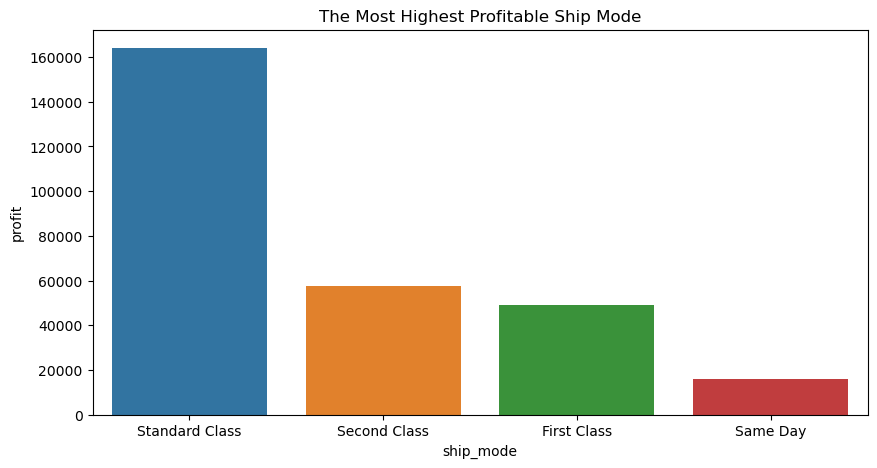

In [12]:
plt.figure(figsize=(10,5))
sales = df.groupby(['ship_mode'],as_index=False)['profit'].sum().sort_values(by='profit',ascending=False)
sns.barplot(data=sales,x='ship_mode',y='profit')
plt.xticks(rotation=0,fontsize=10)
plt.title('The Most Highest Profitable Ship Mode')
plt.show() 

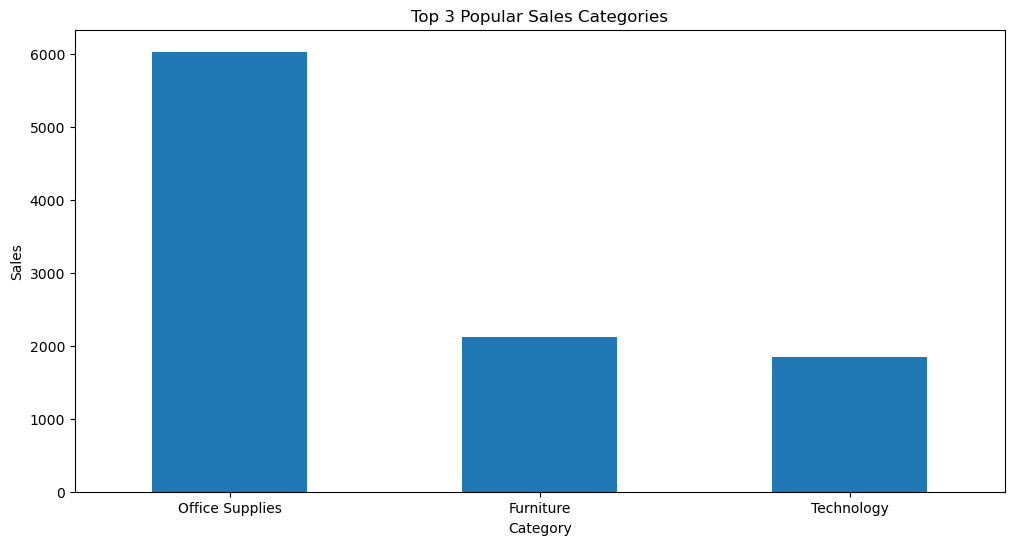

In [13]:
product_counts = df['category'].value_counts()
top_N = 3
top_categories = product_counts.head(top_N)
plt.figure(figsize=(12, 6))
top_categories.plot(kind='bar')
plt.title('Top {} Popular Sales Categories'.format(top_N))
plt.xlabel('Category')
plt.ylabel('Sales')
plt.xticks(rotation=0)  
plt.show()

# Identifying the Most Profitable Region for Maximized Revenue

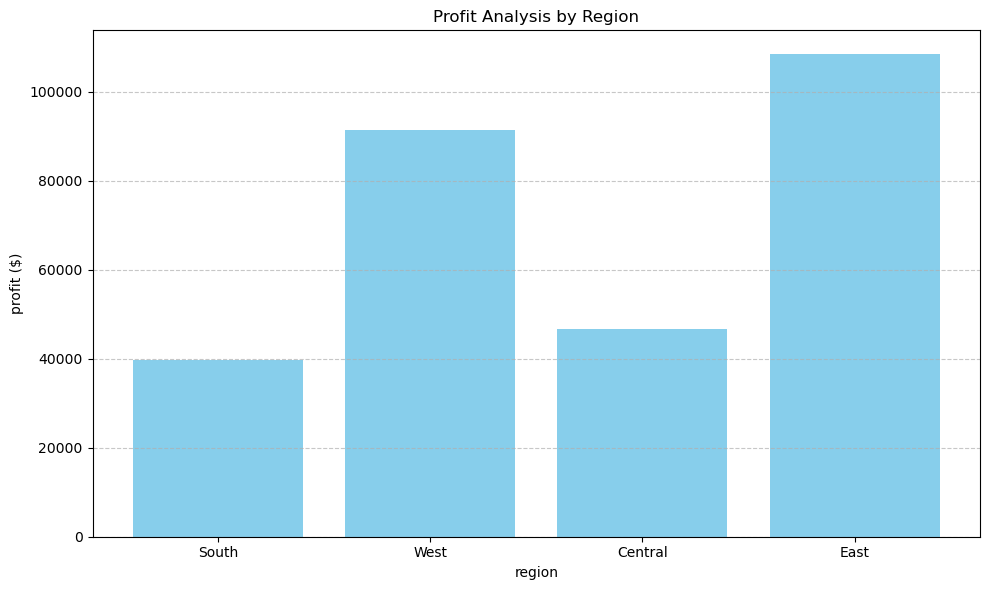

In [14]:
regions = df['region'].unique()  # Define the 'regions' variable
profits = df.groupby('region')['profit'].sum()  # Corrected the misspelling of 'Profit'
plt.figure(figsize=(10, 6))
plt.bar(regions, profits, color='skyblue')
plt.xlabel('region')
plt.ylabel('profit ($)')
plt.title('Profit Analysis by Region')
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout()  
plt.show()

In [15]:
df

,ship_mode,segment,country,city,state,postal_code,region,category,sub-category,sales,quantity,discount,profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


# Simple Linear Regression

In [16]:
# # Import various functions from scikit-learn to help with the model
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split
# from sklearn import metrics

In [17]:
# X = df[['quantity']]
# y = df['profit']

# # Create the train-test split
# # Note the test_size=0.2. This means you will use 20% of the data in your test set.
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=0)
# # Show how X_train and y_train look like
# print(f"Independent (X) variable:\n{X_train.values}\n")
# print(f"Dependent (y) variable:\n{y_train.values}")

Independent (X) variable:
[[4]
 [1]
 [2]
 ...
 [4]
 [3]
 [2]]

Dependent (y) variable:
[ 6.4308  9.5992  3.3088 ...  3.528   9.9522 19.9746]


## Create and Fit the Linear Regression Model


In [18]:
# lr = LinearRegression().fit(X_train, y_train)

In [19]:
# b = lr.intercept_
# w = lr.coef_
# # print(f"Model parameters:\nw: {w},\nb: {b}")

Model parameters:
w: [5.98206271],
b: 4.475889671089554


# Make Predictions and Evaluate the Model

In [22]:
# # Make a prediction using lr.predict()
# y_test_preds = lr.predict(X_test)
# # Make a prediction by hand using w, b.
# y_pred = np.dot(X_test, w) + b
# print(f"prediction using np.dot() and predictions using lr.predict are the same: {(y_pred == y_test_preds).all()}\n")

# # Compare some of the predictions with actual (target) values.
# print(f"Last four predictions on the test set:\n{y_pred[:4]}\n" )
# print(f"Target values \n{y_test[:4].values}\n")

# mae = metrics.mean_absolute_error(y_test, y_test_preds)
# print(f"Mean Absolute Error on the test set: {mae:.2f}")


prediction using np.dot() and predictions using lr.predict are the same: True

Last four predictions on the test set:
[16.4400151  16.4400151  10.45795239 34.38620324]

Target values 
[11.68    9.7438  2.6406 17.745 ]

Mean Absolute Error on the test set: 70.20


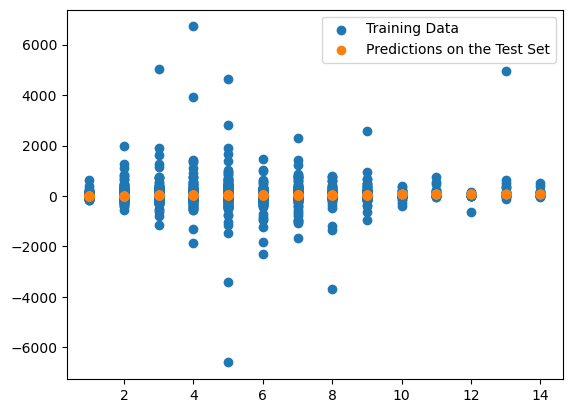

In [23]:
# plt.figure()
# plt.scatter(X_train, y_train, label = 'Training Data')
# plt.scatter(X_test, y_pred, label = 'Predictions on the Test Set')
# plt.legend()